In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [230]:
data = pd.read_csv('loan.csv')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
data.loan_status.value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627
Current,1140


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Cleaned up emp_length column and converted into integer. Replaced NaN values with zero.

In [231]:
data['emp_length'] = data.emp_length.str.replace('+ years', '')

In [232]:
data['emp_length'] = data.emp_length.str.replace(' years', '')

In [233]:
data['emp_length'] = data.emp_length.str.replace('< 1 year', '0')

In [234]:
data['emp_length'] = data.emp_length.str.replace(' year', '')

In [235]:
data['emp_length'] = data.emp_length.str.replace('n/a', '0')

In [236]:
data['emp_length'].isnull().sum()

1075

In [237]:
data['emp_length'].fillna(0, inplace=True)

In [238]:
data['emp_length'] = data.emp_length.astype(int)

In [239]:
data['emp_length']

,emp_length
0,10
1,0
2,10
3,10
4,1
...,...
39712,4
39713,3
39714,0
39715,0


In [240]:
# removed % from the data to convert into numeric
data['int_rate'] = data.int_rate.str.replace('%', '')

In [241]:
data['int_rate'] = data.int_rate.astype(float)

In [242]:
# cleansed the term column. converted to numeric.
data['term'] = data.term.str.replace(' months', '')
data['term'] = data.term.astype(int)

In [243]:
# showing percent of defaulters
data['loan_status'].value_counts(normalize=True) * 100

,proportion
loan_status,
Fully Paid,82.961956
Charged Off,14.167737
Current,2.870307


<Axes: ylabel='count'>

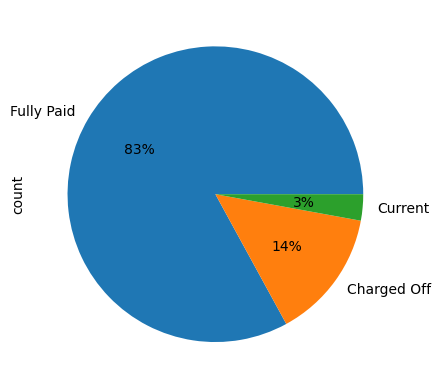

In [49]:
# show in a pie chart and show the precentages as labels
data['loan_status'].value_counts().plot(kind='pie', autopct='%1.0f%%')

,proportion
home_ownership,
RENT,50.453172
MORTGAGE,41.354185
OWN,7.872756
OTHER,0.319886


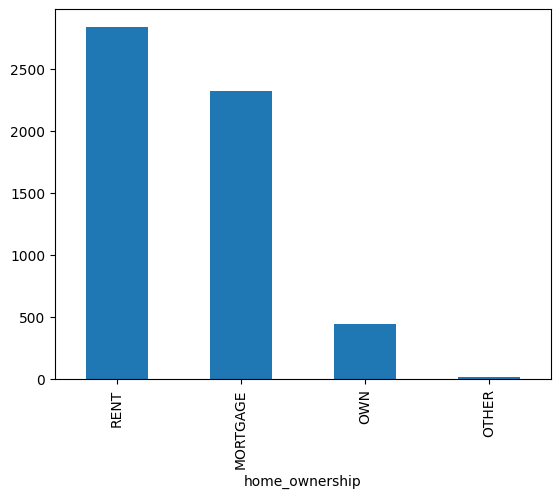

In [64]:
# show if home ownership is a discriminator
data[data['loan_status'] == 'Charged Off'].home_ownership.value_counts().plot(kind='bar')
# show percent
data[data['loan_status'] == 'Charged Off'].home_ownership.value_counts(normalize=True) * 100


<Axes: >

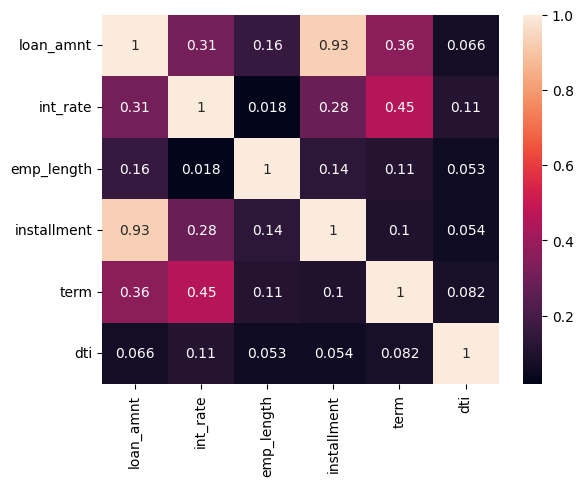

In [244]:
# plotted a heatmap to see the correlation between numeric features
sns.heatmap(data[['loan_amnt', 'int_rate', 'emp_length', 'installment', 'term', 'dti']].corr(), annot=True)

Observere the distribution of defaulters across grades

<Axes: xlabel='grade'>

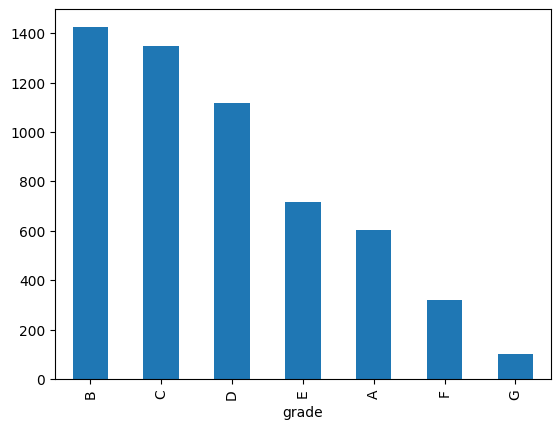

In [78]:
data['grade'][data['loan_status'] == 'Charged Off'].value_counts().plot(kind='bar')

<Axes: xlabel='purpose'>

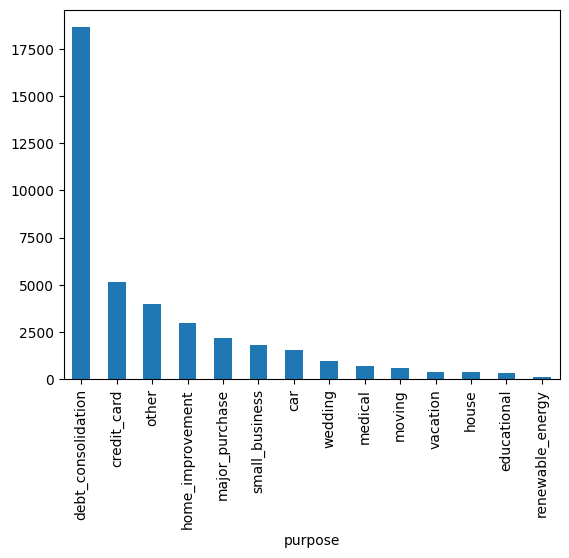

In [152]:
data['purpose'].value_counts().plot(kind='bar')

In [112]:
# default rate of purpose

df_purpose_defaulters = data['purpose'][data['loan_status'] == 'Charged Off'].value_counts()
df_purpose_all = data['purpose'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()


In [114]:
df_purpose_defaulters.reset_index()
df_purpose_all.reset_index()

,purpose,count
0,debt_consolidation,18055
1,credit_card,5027
2,other,3865
3,home_improvement,2875
4,major_purchase,2150
5,small_business,1754
6,car,1499
7,wedding,926
8,medical,681
9,moving,576


In [116]:
df_purpose_defaulters.reset_index()

,purpose,count
0,debt_consolidation,2767
1,other,633
2,credit_card,542
3,small_business,475
4,home_improvement,347
5,major_purchase,222
6,car,160
7,medical,106
8,wedding,96
9,moving,92


In [120]:
# join the two dataframes on purpose column and calculate show counts
df_merged_purposes = pd.merge(df_purpose_defaulters, df_purpose_all, on='purpose')

In [122]:
df_merged_purposes.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)

In [123]:
df_merged_purposes['default_rate'] = df_merged_purposes['count_defaulters'] / df_merged_purposes['count_all']

In [127]:
df_merged_purposes.sort_values(by='default_rate', ascending=False)


,count_defaulters,count_all,default_rate
purpose,,,
small_business,475,1754,0.270810
renewable_energy,19,102,0.186275
educational,56,325,0.172308
other,633,3865,0.163777
house,59,367,0.160763
moving,92,576,0.159722
medical,106,681,0.155653
debt_consolidation,2767,18055,0.153254
vacation,53,375,0.141333


In [128]:
df_merged_purposes.reset_index(inplace=True)

<Axes: xlabel='purpose', ylabel='default_rate'>

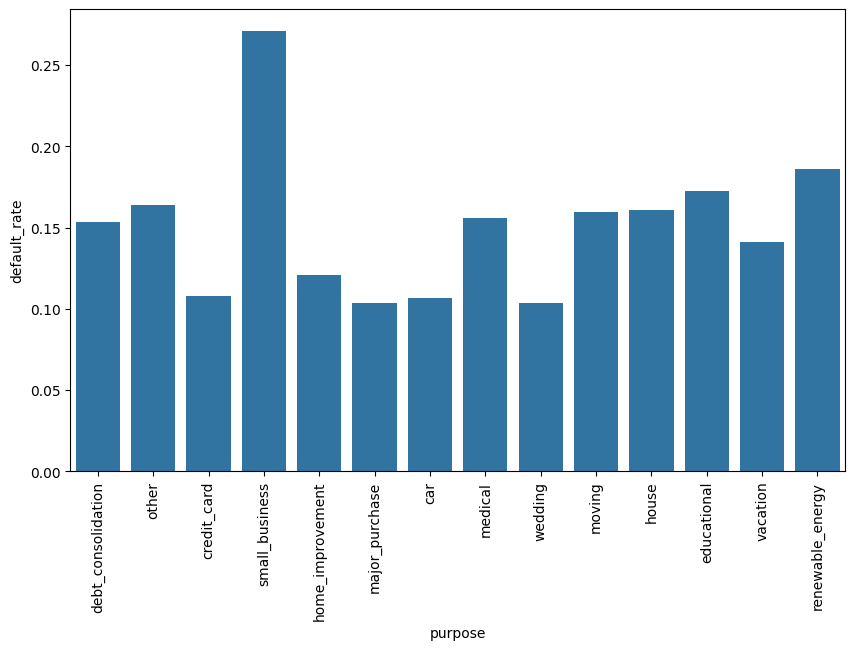

In [130]:
# x labels should be vertical
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='purpose', y='default_rate', data=df_merged_purposes)

In [134]:
df_merged_purposes['Default_Rate_Percent'] = np.round((df_merged_purposes['default_rate']*100),2)

In [135]:
df_merged_purposes

,purpose,count_defaulters,count_all,default_rate,Default_Rate_Percent
0,debt_consolidation,2767,18055,0.153254,15.33
1,other,633,3865,0.163777,16.38
2,credit_card,542,5027,0.107818,10.78
3,small_business,475,1754,0.270810,27.08
4,home_improvement,347,2875,0.120696,12.07
5,major_purchase,222,2150,0.103256,10.33
6,car,160,1499,0.106738,10.67
7,medical,106,681,0.155653,15.57
8,wedding,96,926,0.103672,10.37
9,moving,92,576,0.159722,15.97


In [136]:
# convert into string
df_merged_purposes['Default_Rate_Percent'] = df_merged_purposes['Default_Rate_Percent'].astype(str)

In [137]:
df_merged_purposes['Default_Rate_Percent'] = df_merged_purposes['Default_Rate_Percent'] + '%'

In [141]:
df_merged_purposes[['purpose', 'Default_Rate_Percent']].sort_values(by='Default_Rate_Percent', ascending=False)

,purpose,Default_Rate_Percent
3,small_business,27.08%
13,renewable_energy,18.63%
11,educational,17.23%
1,other,16.38%
10,house,16.08%
9,moving,15.97%
7,medical,15.57%
0,debt_consolidation,15.33%
12,vacation,14.13%
4,home_improvement,12.07%


In [144]:
# do the same for home ownership
df_home_ownership_defaulters = data['home_ownership'][data['loan_status'] == 'Charged Off'].value_counts()
df_home_ownership_all = data['home_ownership'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()
df_merged_home_ownership = pd.merge(df_home_ownership_defaulters, df_home_ownership_all, on='home_ownership')
df_merged_home_ownership
df_merged_home_ownership.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)
df_merged_home_ownership['default_rate'] = df_merged_home_ownership['count_defaulters'] / df_merged_home_ownership['count_all']
df_merged_home_ownership.sort_values(by='default_rate', ascending=False)
df_merged_home_ownership.reset_index(inplace=True)

In [149]:
df_merged_home_ownership['Default_Rate_Percent'] = np.round((df_merged_home_ownership['default_rate']*100),2)
df_merged_home_ownership[['home_ownership', 'Default_Rate_Percent']].sort_values(by='Default_Rate_Percent', ascending=False)

,home_ownership,Default_Rate_Percent
3,OTHER,18.37
0,RENT,15.36
2,OWN,14.89
1,MORTGAGE,13.67


<Axes: xlabel='home_ownership', ylabel='default_rate'>

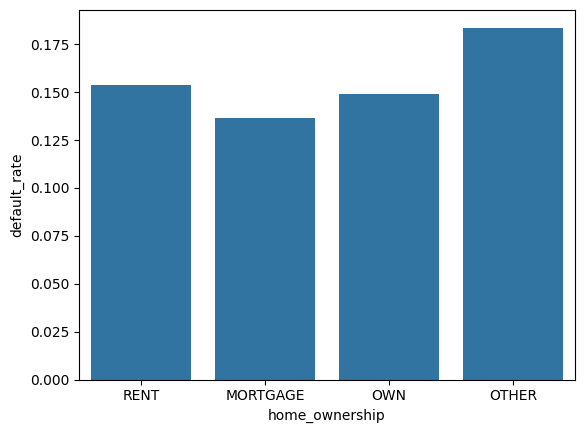

In [151]:
sns.barplot(x='home_ownership', y='default_rate', data=df_merged_home_ownership)

In [166]:
# do the same for Grade
df_grade_defaulters = data['grade'][data['loan_status'] == 'Charged Off'].value_counts()
df_grade_all = data['grade'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()
df_merged_grade = pd.merge(df_grade_defaulters, df_grade_all, on='grade')
df_merged_grade.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)
df_merged_grade['default_rate'] = df_merged_grade['count_defaulters'] / df_merged_grade['count_all']
df_merged_grade['default_rate_percent'] = np.round((df_merged_grade['default_rate']*100),2)
df_merged_grade['default_rate_percent'] = df_merged_grade['default_rate_percent'].astype(str)
df_merged_grade.reset_index(inplace=True)
df_merged_grade['default_rate_percent'] = df_merged_grade['default_rate_percent'] + '%'
df_merged_grade[['grade', 'default_rate_percent']].sort_values(by='grade', ascending=True)

,grade,default_rate_percent
4,A,5.99%
0,B,12.21%
1,C,17.19%
2,D,21.99%
3,E,26.85%
5,F,32.68%
6,G,33.78%


<Axes: xlabel='grade', ylabel='default_rate'>

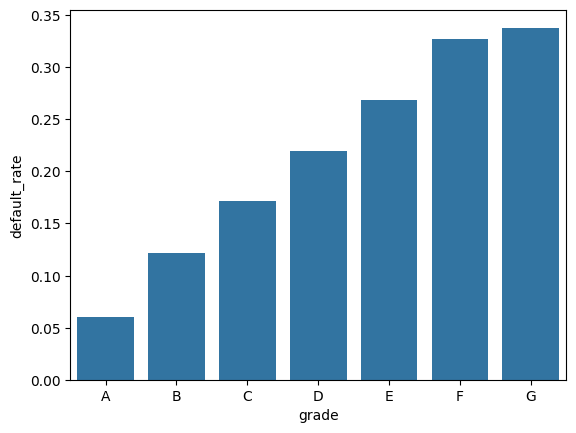

In [168]:
sns.barplot(x='grade', y='default_rate', data=df_merged_grade, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [169]:
# do the same for sub grade
df_sub_grade_defaulters = data['sub_grade'][data['loan_status'] == 'Charged Off'].value_counts()
df_sub_grade_all = data['sub_grade'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()
df_merged_sub_grade = pd.merge(df_sub_grade_defaulters, df_sub_grade_all, on='sub_grade')
df_merged_sub_grade.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)
df_merged_sub_grade['default_rate'] = df_merged_sub_grade['count_defaulters'] / df_merged_sub_grade['count_all']
df_merged_sub_grade['default_rate_percent'] = np.round((df_merged_sub_grade['default_rate']*100),2)
df_merged_sub_grade['default_rate_percent'] = df_merged_sub_grade['default_rate_percent'].astype(str)
df_merged_sub_grade.reset_index(inplace=True)
df_merged_sub_grade['default_rate_percent'] = df_merged_sub_grade['default_rate_percent'] + '%'
df_merged_sub_grade[['sub_grade', 'default_rate_percent']].sort_values(by='sub_grade', ascending=True)


,sub_grade,default_rate_percent
30,A1,2.63%
24,A2,4.91%
22,A3,5.69%
15,A4,6.2%
9,A5,7.99%
16,B1,9.52%
8,B2,11.39%
1,B3,12.07%
3,B4,13.5%
0,B5,13.61%


<Axes: xlabel='sub_grade', ylabel='default_rate'>

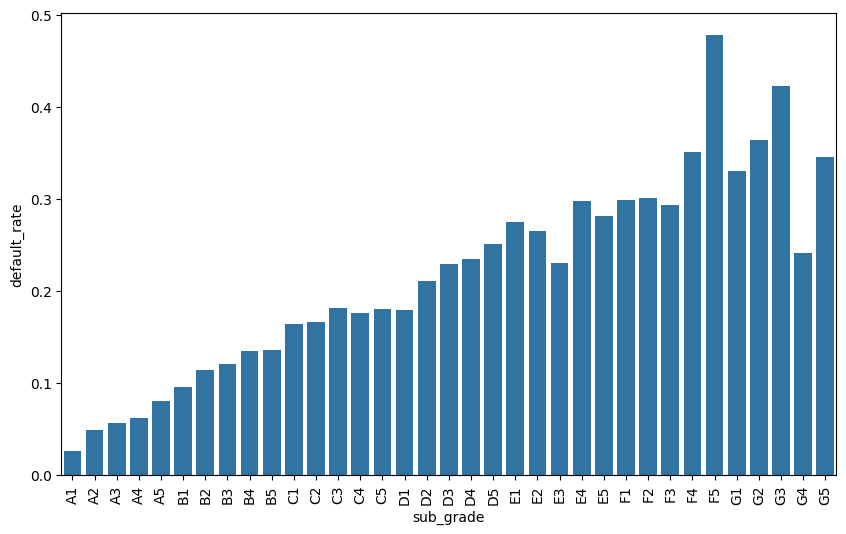

In [173]:
# improve the visuals
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='sub_grade', y='default_rate', data=df_merged_sub_grade, order=['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'])

In [174]:
# do similar analysis for term
df_term_defaulters = data['term'][data['loan_status'] == 'Charged Off'].value_counts()
df_term_all = data['term'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()
df_merged_term = pd.merge(df_term_defaulters, df_term_all, on='term')
df_merged_term.reset_index(inplace=True)
df_merged_term.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)
df_merged_term['default_rate'] = df_merged_term['count_defaulters'] / df_merged_term['count_all']
df_merged_term['default_rate_percent'] = np.round((df_merged_term['default_rate']*100),2)
df_merged_term['default_rate_percent'] = df_merged_term['default_rate_percent'].astype(str)
df_merged_term['default_rate_percent'] = df_merged_term['default_rate_percent'] + '%'
df_merged_term[['term', 'default_rate_percent']].sort_values(by='term', ascending=True)

,term,default_rate_percent
0,36,11.09%
1,60,25.31%


<Axes: xlabel='term'>

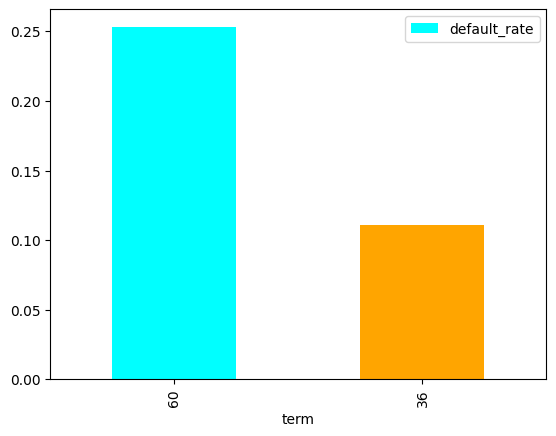

In [181]:
# colors of the bars should be different
df_merged_term[['term', 'default_rate']].sort_values(by='term', ascending=False).plot.bar(x='term', y='default_rate', color=['cyan', 'orange'])

<Axes: xlabel='loan_amnt', ylabel='Count'>

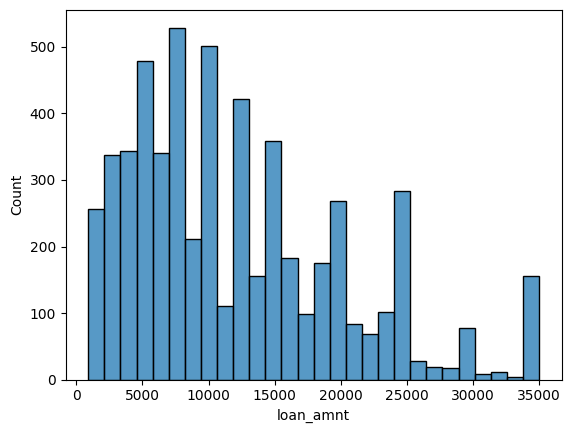

In [182]:
# how loan status varies based on loan amount
sns.histplot(data['loan_amnt'][data['loan_status'] == 'Charged Off'])

In [192]:
# convert installment amounts into a category variable
data['installment_category'] = pd.cut(data['installment'], bins=10)

In [223]:
data[['loan_amnt', 'int_rate', 'grade', 'purpose']] [(data['installment']>900) & (data['installment']<1000) & (data['loan_status'] == 'Charged Off')].sort_values(by=['loan_amnt', 'int_rate'], ascending=False).head(30)

,loan_amnt,int_rate,grade,purpose
3006,35000,23.52,G,debt_consolidation
1691,35000,23.13,G,home_improvement
4913,35000,22.74,G,debt_consolidation
5742,35000,22.74,G,debt_consolidation
6243,35000,22.74,G,debt_consolidation
8306,35000,22.48,G,small_business
1852,35000,22.35,F,debt_consolidation
2393,35000,22.35,F,debt_consolidation
2646,35000,22.35,F,credit_card
7535,35000,22.35,F,debt_consolidation


In [221]:
data['int_rate'].describe()

,int_rate
count,39717.000000
mean,12.021177
std,3.724825
min,5.420000
25%,9.250000
50%,11.860000
75%,14.590000
max,24.590000


In [222]:
data['loan_amnt'].describe()

,loan_amnt
count,39717.000000
mean,11219.443815
std,7456.670694
min,500.000000
25%,5500.000000
50%,10000.000000
75%,15000.000000
max,35000.000000


In [201]:
df_installment_category_defaulters = data['installment_category'][data['loan_status'] == 'Charged Off'].value_counts()
df_installment_category_all = data['installment_category'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()
df_merged_installment_category = pd.merge(df_installment_category_defaulters, df_installment_category_all, on='installment_category')
df_merged_installment_category.reset_index(inplace=True)
df_merged_installment_category.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)
df_merged_installment_category['default_rate'] = df_merged_installment_category['count_defaulters'] / df_merged_installment_category['count_all']
df_merged_installment_category['default_rate_percent'] = np.round((df_merged_installment_category['default_rate']*100),2)
df_merged_installment_category['default_rate_percent'] = df_merged_installment_category['default_rate_percent'].astype(str)
df_merged_installment_category['default_rate_percent'] = df_merged_installment_category['default_rate_percent'] + '%'
df_merged_installment_category[['installment_category', 'default_rate_percent']].sort_values(by='installment_category', ascending=True)

,installment_category,default_rate_percent
2,"(14.4, 144.64]",14.62%
0,"(144.64, 273.59]",13.13%
1,"(273.59, 402.54]",14.46%
3,"(402.54, 531.49]",15.67%
4,"(531.49, 660.44]",16.76%
5,"(660.44, 789.39]",15.88%
6,"(789.39, 918.34]",17.36%
7,"(918.34, 1047.29]",24.88%
8,"(1047.29, 1176.24]",8.63%
9,"(1176.24, 1305.19]",15.07%


<Axes: xlabel='installment_category'>

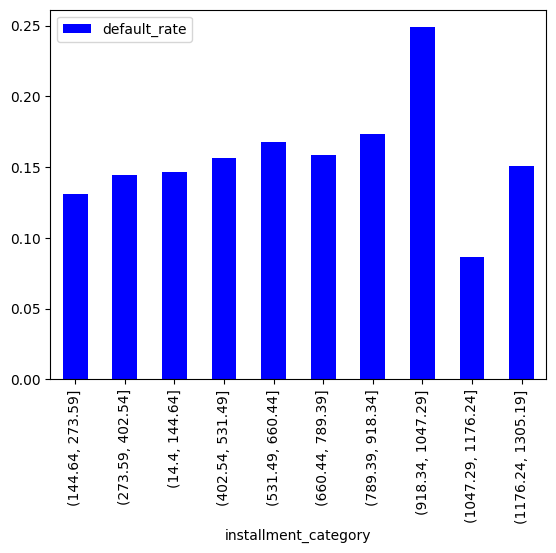

In [200]:
# plot a chart using the bins of installment catehory and default rate to see which bin has got highest default rate
df_merged_installment_category.plot.bar(x='installment_category', y='default_rate', color=['blue'])

In [204]:
# do similar analysis for emp_length
df_emp_length_defaulters = data['emp_length'][data['loan_status'] == 'Charged Off'].value_counts()
df_emp_length_all = data['emp_length'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()
df_merged_emp_length = pd.merge(df_emp_length_defaulters, df_emp_length_all, on='emp_length')
df_merged_emp_length.reset_index(inplace=True)
df_merged_emp_length.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)
df_merged_emp_length['default_rate'] = df_merged_emp_length['count_defaulters'] / df_merged_emp_length['count_all']
df_merged_emp_length['default_rate_percent'] = np.round((df_merged_emp_length['default_rate']*100),2)
df_merged_emp_length['default_rate_percent'] = df_merged_emp_length['default_rate_percent'].astype(str)
df_merged_emp_length['default_rate_percent'] = df_merged_emp_length['default_rate_percent'] + '%'
df_merged_emp_length[['emp_length', 'default_rate_percent']].sort_values(by='emp_length', ascending=True)

,emp_length,default_rate_percent
1,0,15.65%
6,1,14.39%
2,2,13.21%
3,3,13.83%
4,4,13.82%
5,5,14.34%
7,6,14.16%
8,7,15.37%
9,8,14.15%
10,9,12.89%


<Axes: xlabel='emp_length'>

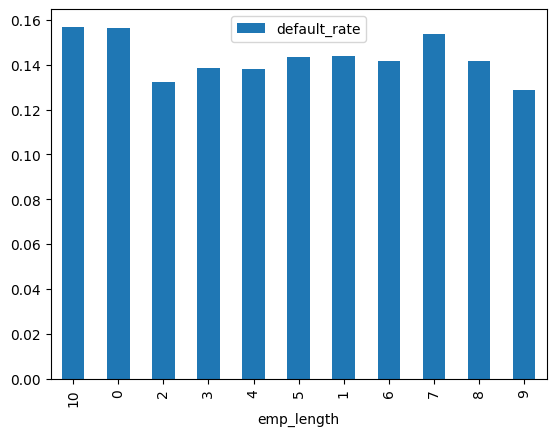

In [205]:
df_merged_emp_length.plot.bar(x='emp_length', y='default_rate')

In [224]:
# find default rates with respect to verification status
df_verification_status_defaulters = data['verification_status'][data['loan_status'] == 'Charged Off'].value_counts()
df_verification_status_all = data['verification_status'][(data['loan_status'] == 'Charged Off') | (data['loan_status'] == 'Fully Paid') ].value_counts()
df_merged_verification_status = pd.merge(df_verification_status_defaulters, df_verification_status_all, on='verification_status')
df_merged_verification_status.reset_index(inplace=True)
df_merged_verification_status.rename(columns={'count_x': 'count_defaulters', 'count_y': 'count_all'}, inplace=True)
df_merged_verification_status['default_rate'] = df_merged_verification_status['count_defaulters'] / df_merged_verification_status['count_all']
df_merged_verification_status['default_rate_percent'] = np.round((df_merged_verification_status['default_rate']*100),2)
df_merged_verification_status['default_rate_percent'] = df_merged_verification_status['default_rate_percent'].astype(str)
df_merged_verification_status['default_rate_percent'] = df_merged_verification_status['default_rate_percent'] + '%'
df_merged_verification_status[['verification_status', 'default_rate_percent']].sort_values(by='verification_status', ascending=True)

,verification_status,default_rate_percent
0,Not Verified,12.83%
2,Source Verified,14.82%
1,Verified,16.8%


<Axes: xlabel='verification_status', ylabel='default_rate'>

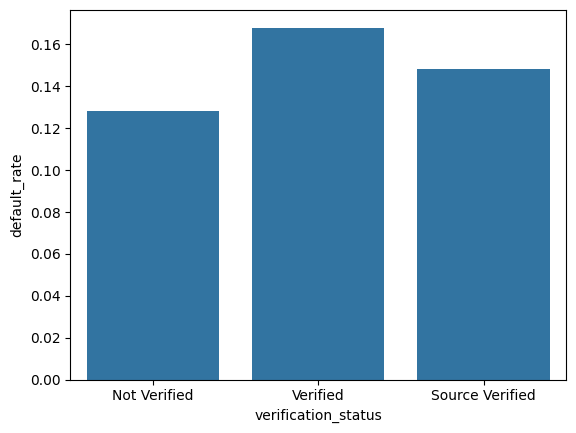

In [225]:
sns.barplot(x='verification_status', y='default_rate', data=df_merged_verification_status)